In [1]:
import os
os.chdir('../src')
import ctypes
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from ulxlc import ULXLC
from constants import params_default

This notebook contains a few tests to see if we can improve the efficiency of ULXLC without sacrificing accuracy.

in order to classify a curve we only require the minimum and maxmimum values, we can save a lot of computing power by
reducing the size of the flux and time arrays as well as changing the timesteps.

It appears that using a timestep = 1.0 with 100 datapoints is sufficient for our purposes and will save a lot of computing power.

In [3]:
ulxlc = ULXLC()

In [4]:
ulxlc.set_params(*params_default)

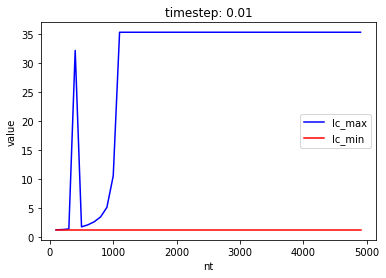

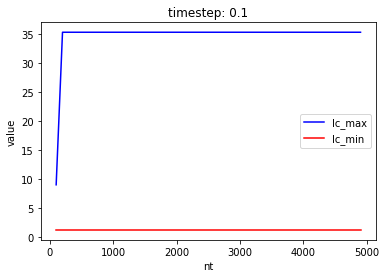

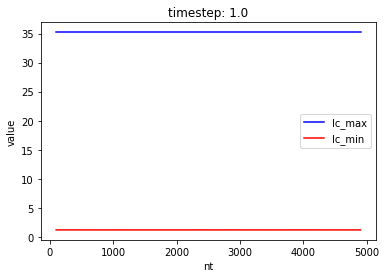

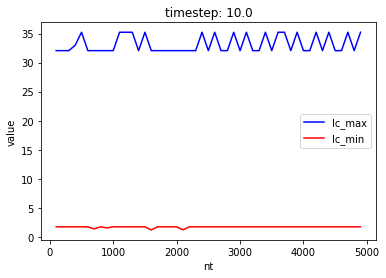

In [5]:
timesteps = [0.01, 0.1, 1.0, 10.0]
nts = list(range(100,5000,100))

for ts in timesteps:
    maxs = []
    mins = []
    for nt in nts:
        ulxlc = ULXLC(nt, ts)
        ulxlc.set_params(*params_default)
        ulxlc.ulxlc_model()
        maxs.append(ulxlc.get_lc_max())
        mins.append(ulxlc.get_lc_min())

    plt.figure()
    plt.title(f'timestep: {ts}')
    plt.xlabel('nt')
    plt.ylabel('value')
    plt.plot(nts, maxs, c='b', label='lc_max')
    plt.plot(nts, mins, c='r', label='lc_min')
    plt.legend()

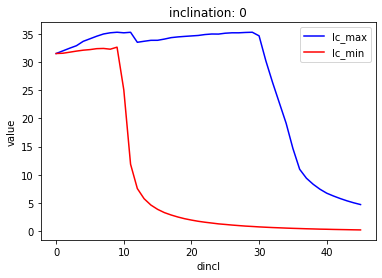

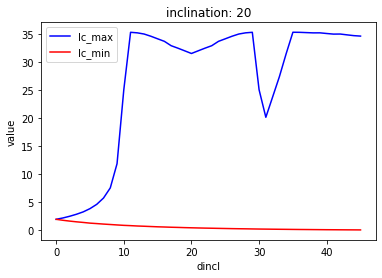

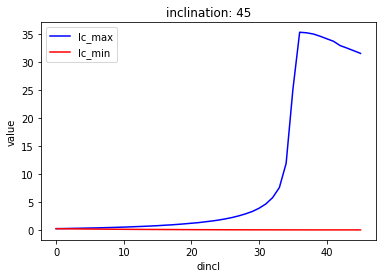

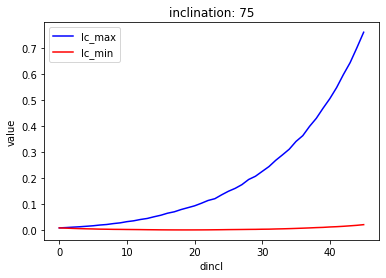

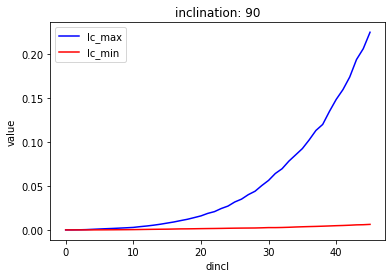

In [18]:
timesteps = 1.0
nts = 100

inclinations = [0,20,45,75,90]
dincls = list(range(46))


ulxlc = ULXLC(nt, ts)

for incl in inclinations:
    maxs = []
    mins = []
    params_default[3] = incl
    for dincl in dincls:
        params_default[4] = dincl
        ulxlc.set_params(*params_default)
        ulxlc.ulxlc_model()
        maxs.append(ulxlc.get_lc_max())
        mins.append(ulxlc.get_lc_min())
    plt.figure()
    plt.title(f'inclination: {incl}')
    plt.xlabel('dincl')
    plt.ylabel('value')
    plt.plot(dincls, maxs, c='b', label='lc_max')
    plt.plot(dincls, mins, c='r', label='lc_min')
    plt.legend()

In [7]:
ulxlc = ULXLC(5000, 0.01)
ulxlc.set_params(*params_default)
%timeit ulxlc.ulxlc_model()

383 µs ± 7.18 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [8]:
ulxlc = ULXLC(2500, 0.1)
ulxlc.set_params(*params_default)
%timeit ulxlc.ulxlc_model()

219 µs ± 1.74 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [9]:
ulxlc = ULXLC(2500, 1.0)
ulxlc.set_params(*params_default)
%timeit ulxlc.ulxlc_model()

183 µs ± 2.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [10]:
ulxlc = ULXLC(500, 1.0)
ulxlc.set_params(*params_default)
%timeit ulxlc.ulxlc_model()

38.3 µs ± 692 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [19]:
ulxlc = ULXLC(100, 1.0)
ulxlc.set_params(*params_default)
%timeit ulxlc.ulxlc_model()

9.36 µs ± 50.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
